In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image



In [2]:
train_datagen=image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2)
train_data= train_datagen.flow_from_directory(directory=r"D:\abcdefghj\Projects\Covid_Detection\Dataset\Train", target_size= (256,256), batch_size=16, class_mode='binary')

Found 288 images belonging to 2 classes.


In [3]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [4]:
val_datagen=image.ImageDataGenerator(rescale=1/255)
val_data= val_datagen.flow_from_directory(directory=r"D:\abcdefghj\Projects\Covid_Detection\Dataset\Val", target_size= (256,256), batch_size=16, class_mode='binary')

Found 60 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))




In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [8]:
model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_data= val_data)

C:\Users\dnyan\AppData\Local\Temp\ipykernel_28820\628806633.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_data= val_data)


Epoch 1/10
8/8 [==============================] - 36s 4s/step - loss: 1.2028 - accuracy: 0.5078 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 45s 6s/step - loss: 0.6715 - accuracy: 0.5469 - val_loss: 0.6492 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 35s 4s/step - loss: 0.5505 - accuracy: 0.7188 - val_loss: 0.4614 - val_accuracy: 0.8167
Epoch 4/10
8/8 [==============================] - 28s 3s/step - loss: 0.3741 - accuracy: 0.8438 - val_loss: 0.3853 - val_accuracy: 0.8833
Epoch 5/10
8/8 [==============================] - 28s 3s/step - loss: 0.3506 - accuracy: 0.8984 - val_loss: 0.2166 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 23s 3s/step - loss: 0.3847 - accuracy: 0.8906 - val_loss: 0.3380 - val_accuracy: 0.8667
Epoch 7/10
8/8 [==============================] - 25s 3s/step - loss: 0.4632 - accuracy: 0.8438 - val_loss: 0.3174 - val_accuracy: 0.9500
Epoch 8/10
8/8 [==================

In [9]:
# Assuming you have a trained model in the variable 'model'

# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(val_data)

# Print the accuracy
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))


4/4 [==============================] - 4s 753ms/step - loss: 0.1260 - accuracy: 0.9833
Validation Accuracy: 98.33%


(1, 256, 256, 3)

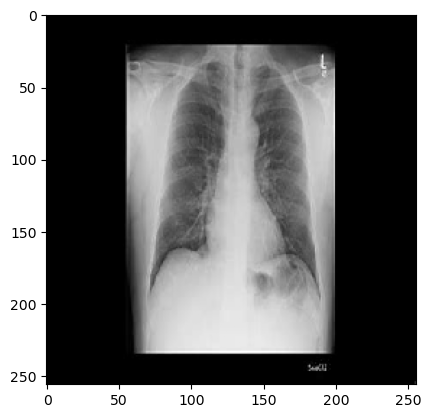

In [20]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
path=r"C:\Users\dnyan\Downloads\OIP.jpg"
img=load_img(path, target_size=(256,256,3))
img= img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [21]:
prediction= (model.predict(img)).astype("int32")
prediction

1/1 [==============================] - 0s 146ms/step


array([[0]])

In [22]:
pred=model.predict(img)

if(pred> 0.5):
    print("Covid")
else:
    print("Normal")

1/1 [==============================] - 0s 42ms/step
Covid


In [23]:
model.save("Covid.h5")


In [24]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Covid.h5')


In [25]:
loaded_model.predict(img)

1/1 [==============================] - 0s 95ms/step


array([[0.93174464]], dtype=float32)